In [1]:
import numpy as np
import math
import arms
import policy
import matplotlib.pyplot as plt
from time import time

In [7]:
# Build your own bandit problem

random_state = np.random.randint(1, 312414)

# this is an example, please change the parameters or arms!
# arm1 = arms.ArmBernoulli(0.30, random_state=random_state)
# arm2 = arms.ArmBernoulli(0.25, random_state=random_state)
# arm3 = arms.ArmBernoulli(0.60, random_state=random_state)
# arm4 = arms.ArmBernoulli(0.80, random_state=random_state)

arm1 = arms.ArmBernoulli(0.30, random_state=random_state)
arm2 = arms.ArmBeta(2, 5, random_state=random_state)
arm3 = arms.ArmExp(1, random_state=random_state)
arm4 = arms.ArmBeta(5, 1, random_state=random_state)

MAB1 = [arm1, arm2, arm3, arm4]

nb_arms = len(MAB1)
means = [arm.mean for arm in MAB1]
mu_max = np.max(means)

runs = 100
T = 5000  # horizon

t0 = time()

reg1 = np.empty((runs,T))
reg2 = np.empty((runs,T))
reg3 = np.empty((runs,T))
oracle = np.empty((runs,T))

for i in range(runs):
    rew1, draws1 = policy.UCB1(T, MAB)
    rew2, draws2 = policy.TS(T, MAB)
    rew3, draws3 = policy.UCB1(T, MAB, naive=True)
    reg1[i,:] = mu_max * np.arange(1, T + 1) - np.cumsum(rew1)
    reg2[i,:] = mu_max * np.arange(1, T + 1) - np.cumsum(rew2)
    reg3[i,:] = mu_max * np.arange(1, T + 1) - np.cumsum(rew3)
    
x = np.arange(1, T+1)
reg_1 = np.mean(reg1, axis=0)
reg_2 = np.mean(reg2, axis=0)
reg_3 = np.mean(reg3, axis=0)
oracle = np.log(x) * Complexity(means)

print("Done in {0:.3f}s".format(time()-t0))

MAB = [arm1, arm2, arm3, arm4]

# bandit : set of arms
nb_arms = len(MAB)
means = [el.mean for el in MAB]

# Display the means of your bandit (to find the best)
print('means: {}'.format(means))
mu_max = np.max(means)

Done in 23.950s
means: [0.3, 0.2857142857142857, 0.41802329313067355, 0.8333333333333334]


In [37]:
def UCB1(T, MAB, rho=0.2, print_info=False, naive=False):
    # Init:
    nb_arms = len(MAB)
    rew = np.zeros(T)
    draws = np.zeros(T).astype(int)
    N = np.zeros(nb_arms).astype(int)
    S = np.zeros(nb_arms)
    for t in range(min(T, nb_arms)):
        rew[t] = MAB[t].sample()
        draws[t] = t
        N[t] += 1
        S[t] += rew[t]
    
    for t in range(nb_arms,T):
        # for each arm, compute the score B
        if naive:
            B = S / N
        else:
            B = S / N + rho * np.sqrt(np.log(t)/(2*N))
        # select next arm
        a_next = np.argmax(B)
        # compute the reward
        r = MAB[a_next].sample()[0]
    
        # Update S and N:
        draws[t] = a_next
        rew[t] = r
        N[a_next] += 1
        S[a_next] += r
        
        if print_info:
            print("t = {}".format(t))
            print("Next Arm to draw: {}".format(a_next + 1))
            print("Reward of the next arm drawn: {}".format(r))
            print("N updated: {}".format(N))
            print("S updated: {}".format(S))
            print("\n")

    return rew,draws

In [38]:
def TS(T, MAB, print_info=False, adaptation=False):
    # init:
    nb_arms = len(MAB)
    rew = np.zeros(T)
    draws = np.zeros(T).astype(int)
    N = np.zeros(nb_arms).astype(int)
    S = np.zeros(nb_arms)
    for t in range(T):
        # compute beta distribution and sample a mu from this distribution
        mu = np.random.beta(S+1, N-S+1)
        a_next = np.argmax(mu)
        r = MAB[a_next].sample()[0]
        
        # For part 1.2 and question 2
        if adaptation:
            r = np.random.binomial(1,r)
            
        draws[t] = a_next
        rew[t] = r
        N[a_next] += 1
        S[a_next] += r
        
        if print_info:
            print("t = {}".format(t))
            print("Next Arm to draw: {}".format(a_next + 1))
            print("Reward of the next arm drawn: {}".format(r))
            print("N updated: {}".format(N))
            print("S updated: {}".format(S))
            print("\n")
    return rew,draws

In [2]:
def KL(x,y):
    return x * np.log(x/y) + (1-x) * np.log((1-x)/(1-y))

def Complexity(p):
    '''
    p: array
    '''
    idx = np.where(p<np.max(p))[0]
    return np.sum((np.max(p)-p)[idx] / np.array([KL(pa,np.max(p)) for pa in p])[idx])

In [8]:
# Comparison of the regret on one run of the bandit algorithm
# try to run this multiple times, you should observe different results
t0 = time()

runs = 100
T = 5000  # horizon

reg1 = np.empty((runs,T))
reg2 = np.empty((runs,T))
reg3 = np.empty((runs,T))
oracle = np.empty((runs,T))

for i in range(runs):
    rew1, draws1 = policy.UCB1(T, MAB)
    rew2, draws2 = policy.TS(T, MAB)
    rew3, draws3 = policy.UCB1(T, MAB, naive=True)
    reg1[i,:] = mu_max * np.arange(1, T + 1) - np.cumsum(rew1)
    reg2[i,:] = mu_max * np.arange(1, T + 1) - np.cumsum(rew2)
    reg3[i,:] = mu_max * np.arange(1, T + 1) - np.cumsum(rew3)
    
x = np.arange(1, T+1)
reg_1 = np.mean(reg1, axis=0)
reg_2 = np.mean(reg2, axis=0)
reg_3 = np.mean(reg3, axis=0)
oracle = np.log(x) * Complexity(means)

print("Done in {0:.3f}s".format(time()-t0))

Done in 20.435s


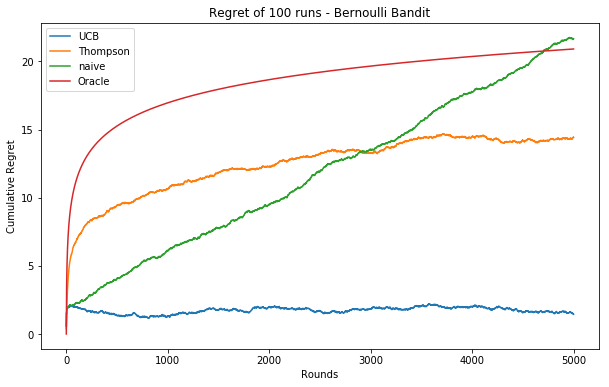

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x, reg_1, label='UCB')
plt.plot(x, reg_2, label='Thompson')
plt.plot(x, reg_3, label='naive')
plt.plot(x, oracle, label='Oracle')
plt.xlabel('Rounds')
plt.ylabel('Cumulative Regret')
plt.legend()
plt.title("Regret of {} runs - Bernoulli Bandit".format(runs))

plt.savefig('Q2')
plt.show()

In [36]:
# UBC1 test
rho = 0.2
T = 10

# Init:
nb_arms = len(MAB)
rew = np.zeros(T)
draws = np.zeros(T).astype(int)
N = np.zeros(nb_arms).astype(int)
S = np.zeros(nb_arms)
for t in range(min(T, nb_arms)):
    rew[t] = MAB[t].sample()
    draws[t] = t
    N[t] += 1
    S[t] += rew[t]
# if T<nb_arms:
#     return rew,draws
for t in range(nb_arms,T):
    # for each arm, compute the score B
    B = S / N + rho * np.sqrt(np.log(t)/(2*N))
    # select next arm
    a_next = np.argmax(B)
    print("Next Arm to draw: %d"%(a_next + 1))
    # compute the reward
    r = MAB[a_next].sample()[0]
    print("Reward of the next arm drawn: %d"%r)
    
    # Update S and N:
    draws[t] = a_next
    rew[t] = r
    N[a_next] += 1
    print("N updated:",N)
    S[a_next] += r
    print("S updated:",S)
    print("\n")

print(rew)
print(draws)

Next Arm to draw: 3
Reward of the next arm drawn: 0
N updated: [1 1 2 1]
S updated: [ 0.  0.  1.  1.]


Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [1 1 2 2]
S updated: [ 0.  0.  1.  2.]


Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [1 1 2 3]
S updated: [ 0.  0.  1.  3.]


Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [1 1 2 4]
S updated: [ 0.  0.  1.  3.]


Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [1 1 2 5]
S updated: [ 0.  0.  1.  4.]


Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [1 1 2 6]
S updated: [ 0.  0.  1.  5.]


[ 0.  0.  1.  1.  0.  1.  1.  0.  1.  1.]
[0 1 2 3 2 3 3 3 3 3]


In [110]:
# Thompson test
T = 10
# init:
nb_arms = len(MAB)
rew = np.zeros(T)
draws = np.zeros(T).astype(int)
N = np.zeros(nb_arms).astype(int)
S = np.zeros(nb_arms)
for t in range(T):
    # compute beta distribution and sample a mu from this distribution
    mu = np.random.beta(S+1, N-S+1)
    a_next = np.argmax(mu)
    r = int(MAB[a_next].sample()[0])
    draws[t] = a_next
    rew[t] = r
    N[a_next] += 1
    S[a_next] += r
    print("Next Arm to draw: %d"%(a_next + 1))
    print("Reward of the next arm drawn: %d"%r)
    print("N updated: {}".format(N))
    print("S updated: {}".format(S))
    print("\n")

Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [0 0 0 1]
S updated: [ 0.  0.  0.  1.]


Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [0 0 0 2]
S updated: [ 0.  0.  0.  2.]


Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [0 0 0 3]
S updated: [ 0.  0.  0.  3.]


Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [0 0 0 4]
S updated: [ 0.  0.  0.  4.]


Next Arm to draw: 4
Reward of the next arm drawn: 1
N updated: [0 0 0 5]
S updated: [ 0.  0.  0.  5.]


Next Arm to draw: 4
Reward of the next arm drawn: 0
N updated: [0 0 0 6]
S updated: [ 0.  0.  0.  5.]


Next Arm to draw: 2
Reward of the next arm drawn: 1
N updated: [0 1 0 6]
S updated: [ 0.  1.  0.  5.]


Next Arm to draw: 3
Reward of the next arm drawn: 1
N updated: [0 1 1 6]
S updated: [ 0.  1.  1.  5.]


Next Arm to draw: 3
Reward of the next arm drawn: 0
N updated: [0 1 2 6]
S updated: [ 0.  1.  1.  5.]


Next Arm to draw: 3
Reward of the next arm drawn: 1
N updated: [

In [ ]:
# 

## py Experience

In [ ]:
# How to print:
print("Next Arm to draw: {}".format(next_action + 1))
print("Done in {0:.3f}s".format(time()-t0))

In [ ]:
def UCB1(self, T, naive=False):

        """
        The UCB1 algorithm starts with an initialization phase that draws each arm once, and then for each t more than K,
        it chooses the arm to draw at t+1 according to a optimal function to maximize
        :param T:
        :param MAB:
        :return:
        """
        # Initialization
        number_draws, rewards = self.initialize()
        rew = []
        draw = []

        for t in range(T):
            print("len = {}".format(t))
            if naive:
                opt_func = rewards / number_draws
            else:
                opt_func = rewards / number_draws + np.sqrt(np.log(t + 1) / (2. * number_draws))
            print("optimization function from which we get the argmax: {}".format(opt_func))

            # Get the argmax from the optimization function
            next_action = np.argmax(opt_func)
            print("Next Arm to draw: {}".format(next_action + 1))

            next_arm = self.MAB[next_action]
            r = next_arm.sample()
            print("Reward of the next arm drawn: {}".format(r))

            # Updating the N(t) and S(t)
            number_draws[next_action] += 1
            print("N vector updated: {}".format(number_draws))

            rewards[next_action] += r
            print("S vector updated: {}".format(rewards))

            # Lists of rewards and actions(arms drawn)
            draw.append(next_action)
            rew.append(r)

        return rew, draw